In [1]:
import pandas as pd
from sklearn import datasets
import numpy as np

In [2]:
df = pd.read_csv("salary classification.csv")
df.head()

,age,education-num,capital-gain,hours-per-week,income
0,39,13,2174,40,<=50K
1,50,13,0,13,<=50K
2,38,9,0,40,<=50K
3,53,7,0,40,<=50K
4,28,13,0,40,<=50K


In [3]:
df.shape

(32561, 5)

In [4]:
# as the income column is having speacial character and values we need to do mapping

In [5]:
income_set=set(df['income'])
df['income']=df['income'].map({'<=50K':0,'>50K':1}).astype(int)
df.head(20)

,age,education-num,capital-gain,hours-per-week,income
0,39,13,2174,40,0
1,50,13,0,13,0
2,38,9,0,40,0
3,53,7,0,40,0
4,28,13,0,40,0
5,37,14,0,40,0
6,49,5,0,16,0
7,52,9,0,45,1
8,31,14,14084,50,1
9,42,13,5178,40,1


In [6]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [7]:
X_train=X[:-1000]
Y_train=Y[:-1000]

In [8]:
X_test=X[-1000:]
Y_test=Y[-1000:]

Another way to split data into train and test randomly 

from sklearn.model_selection import train_test_split 

X_train ,X_test, Y_train , Y_test = train_test_split (X , Y , test_size= 0.25, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [10]:
X_train

array([[ 0.03299111,  1.1371306 ,  0.14818764, -0.03461658],
       [ 0.83969311,  1.1371306 , -0.146232  , -2.22634038],
       [-0.04034544, -0.4200101 , -0.146232  , -0.03461658],
       ...,
       [-0.18701853,  1.1371306 , -0.146232  ,  0.29008325],
       [-0.40702817, -0.4200101 ,  0.89493551,  0.61478307],
       [ 0.10632765, -0.4200101 , -0.146232  , -0.03461658]])

In [11]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [12]:
error = []

for i in range(1,40):
    model=KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train,Y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    

Text(0, 0.5, 'Mean Error')

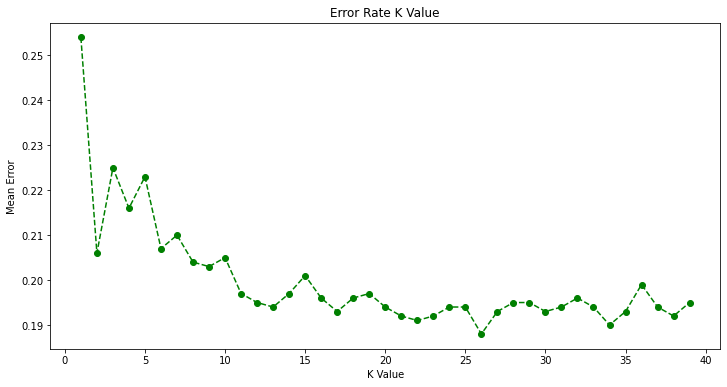

In [13]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,'g--',marker='o')
plt.title("Error Rate K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Error")

Now we got the value of k as around 5 
so taking k = 5 and training the model again

In [14]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors = 5 , metric='minkowski',p=1)
model.fit(X_train,Y_train)

KNeighborsClassifier(p=1)

In [15]:
Y_pred = model.predict(X_test)

Now checking the accuracy

In [16]:
from sklearn.metrics import accuracy_score , confusion_matrix

print("Accuracy of the model is {0}%".format(accuracy_score(Y_pred,Y_test)*100))

Accuracy of the model is 78.0%


Now predicting the output from user given values

In [22]:
age = int(input("Enter the age"))
edu = int(input("Enter the education"))
cg= int(input("Enter the capital gain"))
wh=int(input("Enter the worl hour"))

new_feat=[[age,edu,cg,wh]]
ans = model.predict(sc.transform(new_feat))

print(ans)

if(ans==0):
    print("Salary is below 50K")
else:
    print("Salary is babbbal")

Enter the age40
Enter the education15
Enter the capital gain0
Enter the worl hour45
[1]
Salary is babbbal


C:\Users\KIIT01\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
